# Introduction to Topological Data Analysis

This notebook contains examples illustrating basic concepts from the field of Topological Data Analysis. Please see the accompanying lecture slides for more explanation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Example 1: Clustering Algorithms

We demonstrate the performance of several clustering algorithms on the following toy dataset.

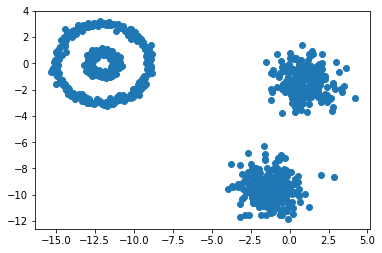

In [2]:
# Import packages for creating toy datasets and plotting
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

# Create two datasets using above functions
X1, y1 = make_circles(n_samples=500, noise = 0.05, factor=0.3, random_state = 3)
X2, y2 = make_blobs(n_samples=500, centers=2, center_box = (-10,10), random_state=2)

# Combine the toy datasets. The first one is scaled and translated.
X = np.concatenate((3*X1-np.array([[12,0]]),X2),axis=0)

# Plot the result
plt.scatter(X[:,0],X[:,1]);

### $k$-Means Clustering

One of the most basic clustering algorithms is *$k$-Means Clustering*. The function is included in `scikit-learn`. To run $k$-Means, one must choose $k$. This is a nontrivial task in *unsupervised* learning, where ground truth labels are not known.

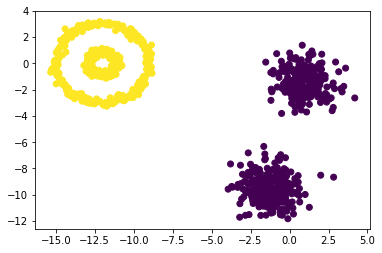

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X) 
# Choose 2 clusters to start
# It's pretty clear that this is not the correct choice

plt.scatter(X[:,0],X[:,1],c = kmeans.labels_);

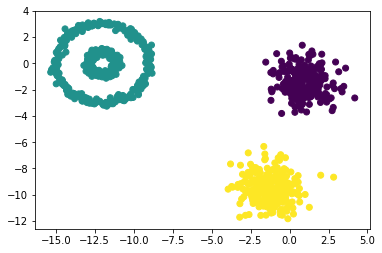

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(X) 
# 3 clusters gives something reasonable
# Still not correct

plt.scatter(X[:,0],X[:,1],c = kmeans.labels_);

No matter how many clusters we choose, $k$-Means will not be able to separate the concentric circles---the means of the circles are the same, so there is no hope!

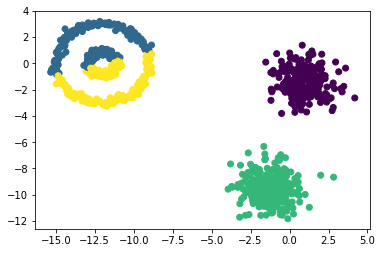

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(X) 

plt.scatter(X[:,0],X[:,1],c = kmeans.labels_);

### DBSCAN

Another popular clustering alborithm is DBSCAN. DBSCAN will choose the number of clusters based on the data. There are different parameters to choose here -- `eps` and `min_samples` -- which have a big effect on the performance of the algorithm

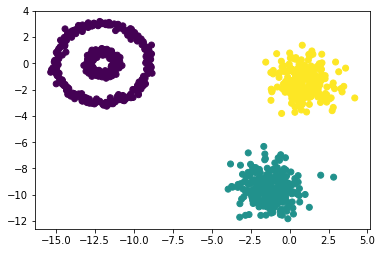

In [6]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 2, min_samples=5).fit(X)
plt.scatter( X[:,0], X[:,1], c=dbscan.labels_ );

If we tune the parameters correctly, DBSCAN will be able to separate the concentric circles.

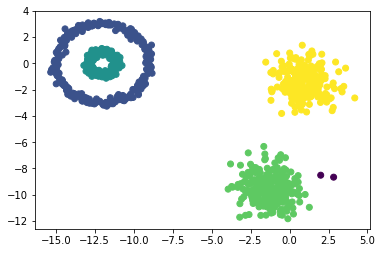

In [7]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 1, min_samples=5).fit(X)
plt.scatter( X[:,0], X[:,1], c=dbscan.labels_ );

### Hierarchical Clustering

These clustering algorithms (and most others) have a common type of output -- they partition the data into labeled subsets. This misses 'finer scale' clustering behavior. I.e., the concentric circles seem to form their own subcluster, as do the 'blobs'. 

There is another style of clustering algorithm called *hierarchical clustering* which produces a summary of clustering behavior at all scales. The output here can be viewed as a *dendrogram*. 

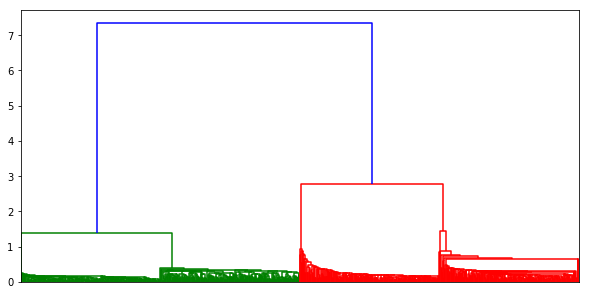

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage  

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
linked = linkage(X, 'single')
dendrogram(linked, labels = None, show_leaf_counts=False)
ax.set_xticklabels([]);

The above shows that there are two clusters at the largest scale. Each of those consists of two clusters at a smaller scale. Below this there are lots of very indistinct clusters, which can be read as 'noise'. 

Labels for the points can be extracted from the dendrogram via the *agglomerative clustering* algorithm. Like $k$-Means, the function requires us to choose a number of clusters. The difference is that we can now make a very educated guess, using the dendrogram as our guide.

We can see the two biggest clusters...

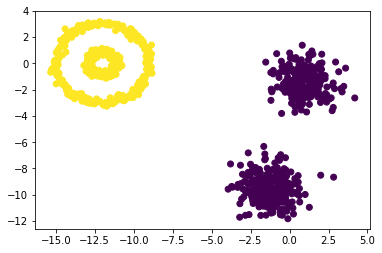

In [9]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, linkage = 'single')
ac.fit(X)
plt.scatter(X[:,0],X[:,1],c=ac.labels_);

... or the 4 biggest clusters ...

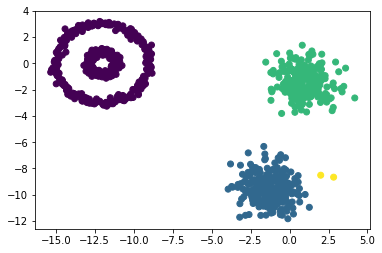

In [10]:
ac = AgglomerativeClustering(n_clusters=4, linkage = 'single')
ac.fit(X)
plt.scatter(X[:,0],X[:,1],c=ac.labels_);

... or the 5 biggest clusters, which looks like the output of DBSCAN ...

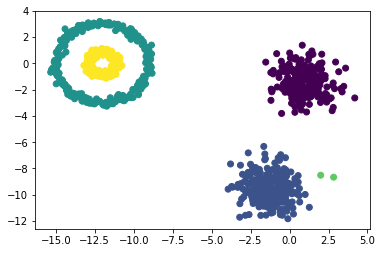

In [11]:
ac = AgglomerativeClustering(n_clusters=5, linkage = 'single')
ac.fit(X)
plt.scatter(X[:,0],X[:,1],c=ac.labels_);

... or however many clusters we want, which will pick out increasingly fine information.

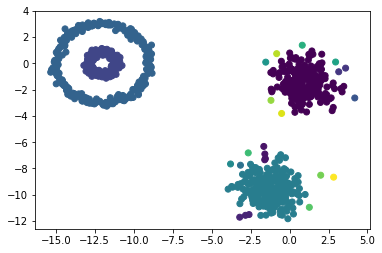

In [12]:
ac = AgglomerativeClustering(n_clusters=20, linkage = 'single')
ac.fit(X)
plt.scatter(X[:,0],X[:,1],c=ac.labels_);

## Example 2: Computing Persistence Diagrams

The main topological feature that is used in TDA is called a *persistence diagram*. In this example we compute persistence diagrams for several point clouds. We will use specialized Python packages for TDA called `ripser` and `persim`.

In [13]:
# Import packages
from ripser import ripser
# ripser is a package for computing barcodes from Vietoris-Rips complexes
from persim import plot_diagrams 
# persim is a package for displaying and computing distances between persistence diagrams

### Random Point Cloud

We begin by defining a toy dataset. Let's just take a bunch of random points in the plane.

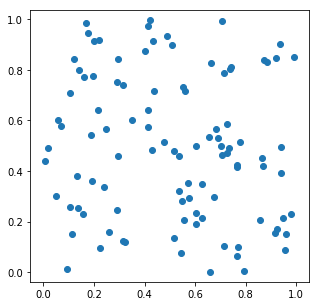

In [14]:
data = np.random.random((100,2)) # Define a random point cloud of 100 points in the plane
fig = plt.figure(figsize=(5,5)) # Create a figure to display the random point cloud
ax = fig.add_subplot(111)
ax.scatter(data[:, 0], data[:, 1]) # Plot the data on the axes. +b plots as a scatter plot of blue + signs.
ax.axis('equal'); # Set the aspect ratio to use equal axis scales.

Now we compute the persistent homology of the dataset. This is done by applying the `ripser` function. Ripser has lots of options, such as range of dimensions to compute, type of data etc.

In [15]:
ripserData = ripser(data)

Let's take a look at the output of ripser.

In [16]:
ripserData

{'cocycles': [[], []], 'dgms': [array([[0.        , 0.00713512],
         [0.        , 0.00830239],
         [0.        , 0.01069446],
         [0.        , 0.01732328],
         [0.        , 0.01818344],
         [0.        , 0.01902588],
         [0.        , 0.02077563],
         [0.        , 0.02097372],
         [0.        , 0.02137912],
         [0.        , 0.02453944],
         [0.        , 0.02468194],
         [0.        , 0.02664483],
         [0.        , 0.02902006],
         [0.        , 0.02961209],
         [0.        , 0.03003497],
         [0.        , 0.03014161],
         [0.        , 0.03054953],
         [0.        , 0.0309577 ],
         [0.        , 0.03117905],
         [0.        , 0.03178047],
         [0.        , 0.03228818],
         [0.        , 0.03288292],
         [0.        , 0.0342421 ],
         [0.        , 0.03446572],
         [0.        , 0.03456699],
         [0.        , 0.03485581],
         [0.        , 0.03513664],
         [0.        , 0.0

The types of things that ripser computed are listed under various 'keys'. Let's take a look at those.

In [17]:
ripserData.keys()

['dperm2all', 'cocycles', 'num_edges', 'r_cover', 'idx_perm', 'dgms']

The computation that we really care about is under the 'dgms' key.

In [18]:
diagrams = ripser(data)['dgms'] # Pick off the dgms part of the ripser output
print(diagrams) # Look at the the output

[array([[0.        , 0.00713512],
       [0.        , 0.00830239],
       [0.        , 0.01069446],
       [0.        , 0.01732328],
       [0.        , 0.01818344],
       [0.        , 0.01902588],
       [0.        , 0.02077563],
       [0.        , 0.02097372],
       [0.        , 0.02137912],
       [0.        , 0.02453944],
       [0.        , 0.02468194],
       [0.        , 0.02664483],
       [0.        , 0.02902006],
       [0.        , 0.02961209],
       [0.        , 0.03003497],
       [0.        , 0.03014161],
       [0.        , 0.03054953],
       [0.        , 0.0309577 ],
       [0.        , 0.03117905],
       [0.        , 0.03178047],
       [0.        , 0.03228818],
       [0.        , 0.03288292],
       [0.        , 0.0342421 ],
       [0.        , 0.03446572],
       [0.        , 0.03456699],
       [0.        , 0.03485581],
       [0.        , 0.03513664],
       [0.        , 0.03741566],
       [0.        , 0.03831533],
       [0.        , 0.03889388],
       [0

We see that the output of diagrams is a pair of arrays. These are points in the persistence diagram for degree-0 and degree-1 persistent homology, respectively. We can now plot these diagrams. This can be done on separate axes, or on the same axis.

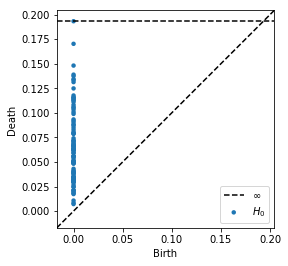

In [19]:
plot_diagrams(diagrams[0]) # Just degree-0

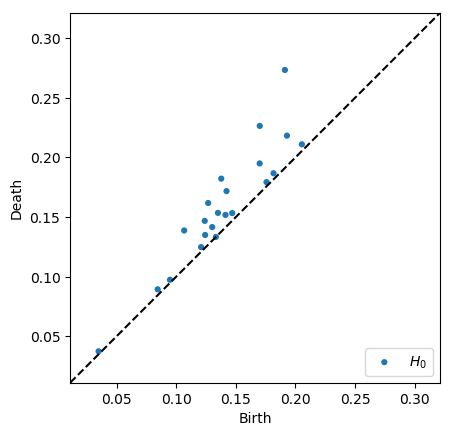

In [20]:
plot_diagrams(diagrams[1]) # Just degree-1

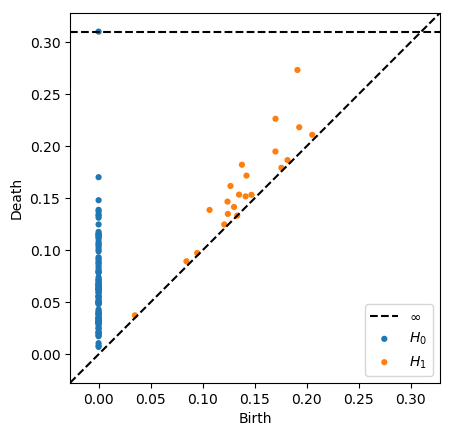

In [21]:
plot_diagrams(diagrams) # Both degree-0 and degree-1

### Circles and Blobs

Applying persistent homology to the dataset from Example 1, we observe the multiscale clustering structure as wel as the fact that there are circles in the data.

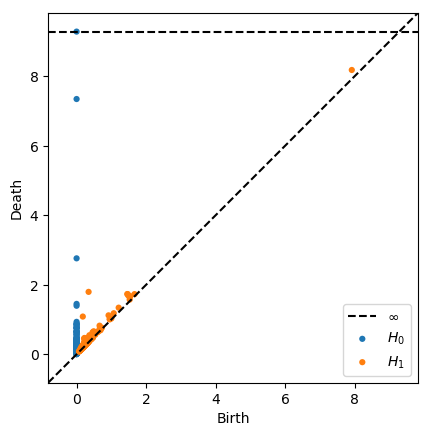

In [22]:
diagrams = ripser(X)['dgms']
plot_diagrams(diagrams)

### Spheres

Let's examine the persistent homology of point clouds on spheres. First we define a function to randomly sample from Euclidean spheres. Then we sample 250 points from a sphere in 3-space and plot the result.

In [23]:
# Define a function to sample randomly from a sphere
def sample_spherical(npoints, ndim=3):
    sample = np.random.randn(ndim, npoints)
    sample /= np.linalg.norm(sample, axis=0)
    sample = sample.T
    return sample

# Randomly sample from a sphere with added noise
def noisy_sample_spherical(npoints, ndim, noise_level = 0.01):
    sphere = sample_spherical(npoints, ndim)
    noise = np.random.multivariate_normal(ndim*[0], noise_level*np.eye(ndim), npoints)
    sample = sphere + noise
    return sample

Let's first look at a sphere sitting in $\mathbb{R}^2$, a.k.a. a circle.

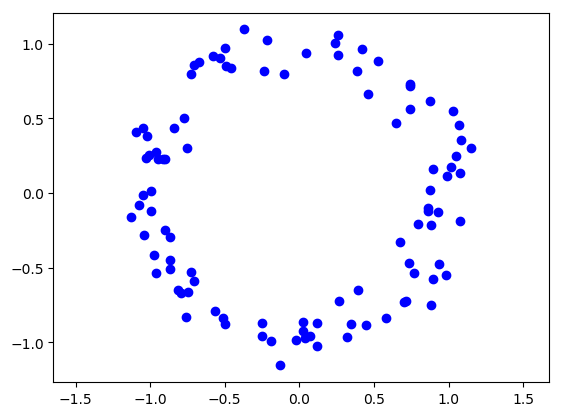

In [29]:
data = noisy_sample_spherical(100,2)
# Generate the noisy circle.

# Plot the data as a scatter plot.
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data[:, 0], data[:, 1], 'ob', label='Source samples');
ax1.axis('equal');

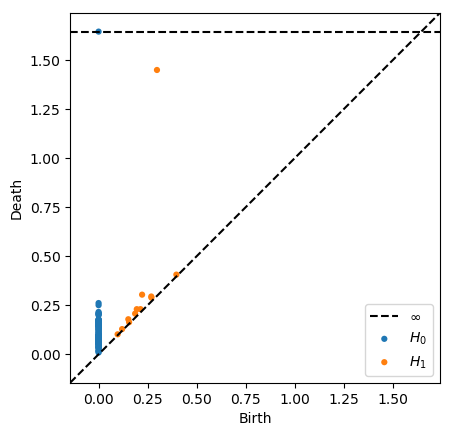

In [30]:
dgms = ripser(data)['dgms']
plot_diagrams(dgms, show=True)

Playing with parameters, we can make the circle more densely sampled or much noisier.

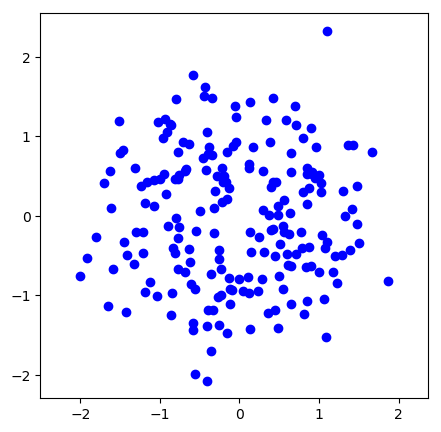

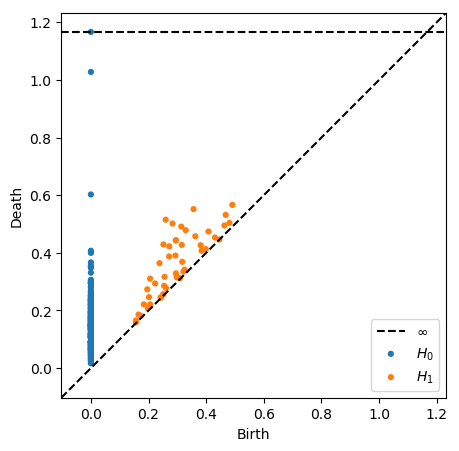

In [31]:
numsamp = 200
noise = .2

data = noisy_sample_spherical(numsamp,ndim=2,noise_level=noise)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(data[:, 0], data[:, 1], 'ob');
ax1.axis('equal')
dgms = ripser(data)['dgms']
fig2 = plt.figure(figsize=(5,5))
plot_diagrams(dgms, show=True)

Now let's compute the persistence diagrams for a sphere in $\mathbb{R}^3$. We can specify that we want to compute homology up to degree-2. We then plot the persistence diagrams on the same axes.

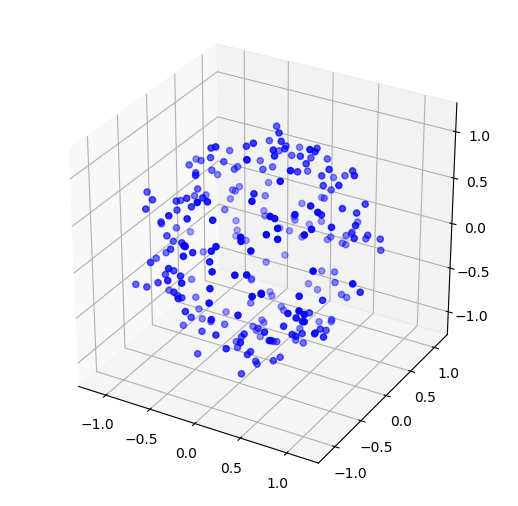

In [32]:
sphere = noisy_sample_spherical(250,3)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(sphere250[:,0],sphere250[:,1],sphere250[:,2], c='b', marker='o');
ax.set_aspect('equal');

Computation Time: 3.41035699844 seconds


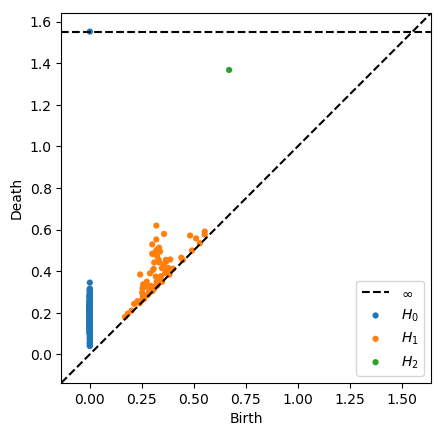

In [33]:
import time

start0 = time.time()
diagrams = ripser(sphere,maxdim=2)['dgms']
plot_diagrams(diagrams)
end0 = time.time()

print('Computation Time: ' + str(end0 - start0) + ' seconds')

Observe in the persistence diagrams that there is one highly persistent 0-cycle and a single 2-cycle. These reflect the topology of the sphere.

# Example 3: Filtering an Image

This example is adapted from one appearing in the documentation for Ripser https://github.com/scikit-tda/ripser.py.

The goal is to apply these techniques to study the following stock image of a dragonfly wing, available at <a href = "https://all-free-download.com/free-photos/download/dragonfly-wings_207742.html">this link</a>

<img src = "dragonfly_wings.jpg">

If we think of each pixel value as the output of a function, this image can be understood as the graph of a surface. If white pixels correspond to large function values, then we can imagine that the center of each 'cell' in the wing corresponds to a local max of the function. If we take the negative of our function, each cell corresponds to a local min.

We suspect that the degree-0 persistent homology of a sublevel set filtration of this graph would pick out these local mins as points with high persistence. The goal of this example is to test this intuition. 

## Processing the Image

We begin by converting the image to true greyscale, then smoothing it (creating a smoother surface graph).

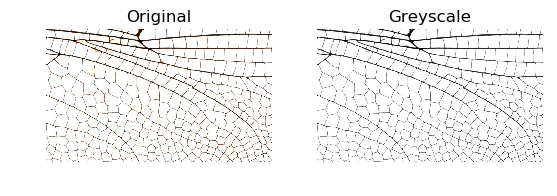

In [34]:
import PIL

wing_original = plt.imread("dragonfly_wings.jpg")
wing_grey = np.asarray(PIL.Image.fromarray(wing_original).convert('L'))

plt.subplot(121)
plt.title('Original')
plt.imshow(wing_original)
plt.axis('off')
plt.subplot(122)
plt.title('Greyscale')
plt.imshow(wing_grey, cmap='gray')
plt.axis('off')
plt.show()

When we smooth, we will add a small amount of noise to each pixel value. This is a *hack* to make the pixel values unique. It will help us plot later.

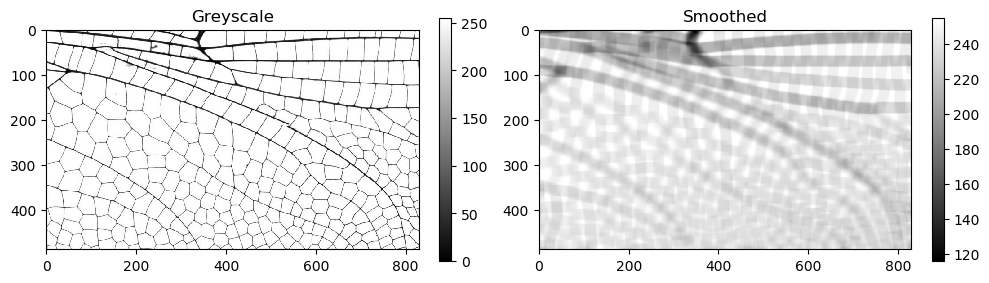

In [38]:
from scipy import ndimage

# Smooth the image using a moving average and add some random noise
smoothed = ndimage.uniform_filter(wing_grey.astype(np.float64), size=25)
smoothed += 0.01 * np.random.randn(*smoothed.shape)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Greyscale')
im = plt.imshow(wing_grey, cmap='gray')
plt.colorbar(im, fraction=0.03)

plt.subplot(122)
im = plt.imshow(smoothed, cmap='gray')
plt.title('Smoothed')
plt.colorbar(im, fraction=0.03)

plt.tight_layout()
plt.show()

Now compute the sublevel set filtration for the image surface. Superlevel set filtrations for image data are built into `ripser` as `lower_star_img`. Recall that we take the negative of our surface to get white pixels to be local minima.

We display the persistence diagram with 'birth time' on the $x$-axis and 'lifetime' on the $y$-axis (lifetime = death time - birth time).

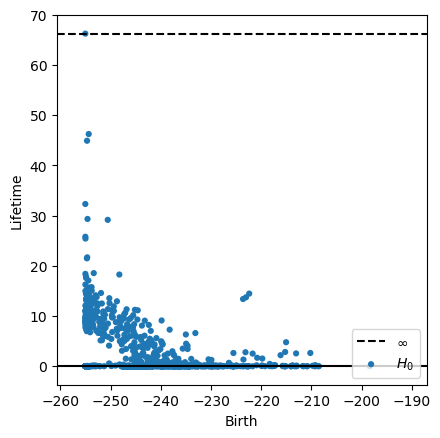

In [39]:
from ripser import lower_star_img

dgm = lower_star_img(-smoothed)
plot_diagrams(dgm, lifetime=True)
plt.show()

Looks like something interesting happens for lifetime around 5. Let's threshold there, then plot the pixels generating the homology classes on top of the original image.

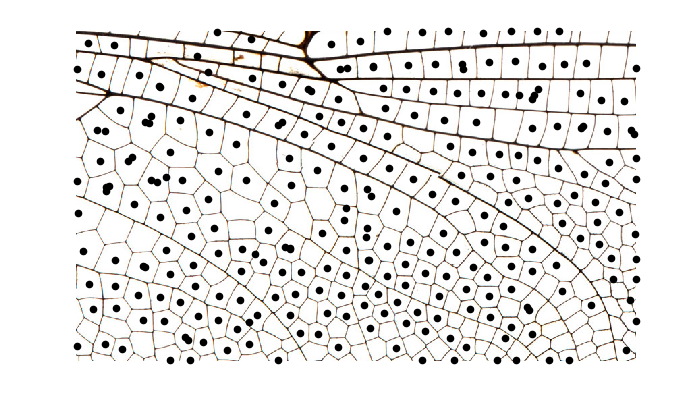

In [40]:
thresh = 5
# Create list of indices up to number of points in persistence diagram
idxs = np.arange(dgm.shape[0])
# Find indices of points with long persistence
idxs = idxs[np.abs(dgm[:, 1] - dgm[:, 0]) > thresh]

# Plot original wing image
plt.figure(figsize=(8, 5))
plt.imshow(wing_original)

# Plot points generating high-persistence points in the diagram
X, Y = np.meshgrid(np.arange(smoothed.shape[1]), np.arange(smoothed.shape[0]))
X = X.flatten()
Y = Y.flatten()
for idx in idxs:
    bidx = np.argmin(np.abs(smoothed + dgm[idx, 0]))
    plt.scatter(X[bidx], Y[bidx], 20, 'k')
plt.axis('off')

plt.show()

This does a pretty good (not perfect!) job. We could play around with the noise levels and thresholds to see if we can get a better result.